## STUDENT PERFORMANCE
* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

## PROBLEM STAEMENT
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('stud.csv')
data

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## DATASET Information

* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,     associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score

## DATA CHECKING

In [4]:
data.isnull().sum().sort_values(ascending=True)

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are NO Missing Values

In [5]:
data.duplicated().sum()

0

THERE ARE NO DUPLICATE VALES

In [6]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# DATA statistics

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
data.nunique().sort_values(ascending=True)

gender                          2
lunch                           2
test_preparation_course         2
race_ethnicity                  5
parental_level_of_education     6
reading_score                  72
writing_score                  77
math_score                     81
dtype: int64

## EXPLORING DATA

In [9]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
print("categories in 'Gender' Variable  :  ", data['gender'].unique() )
print("categories in 'Lunch' Variable  :  ", data['lunch'].unique() )
print("categories in 'test_preparation_course' Variable  :  ", data['test_preparation_course'].unique() )
print("categories in 'race_ethnicity' Variable  :  ", data['race_ethnicity'].unique() )
print("categories in 'parental_level_of_education' Variable  :  ", data['parental_level_of_education'].unique() )


categories in 'Gender' Variable  :   ['female' 'male']
categories in 'Lunch' Variable  :   ['standard' 'free/reduced']
categories in 'test_preparation_course' Variable  :   ['none' 'completed']
categories in 'race_ethnicity' Variable  :   ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental_level_of_education' Variable  :   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


# creating total marks and avg score

In [11]:
data['total_marks'] = data['math_score'] + data['reading_score'] + data['reading_score']
data['average_marks'] = data['total_marks']/3

In [12]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,average_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,216,72.000000
1,female,group C,some college,standard,completed,69,90,88,249,83.000000
2,female,group B,master's degree,standard,none,90,95,93,280,93.333333
3,male,group A,associate's degree,free/reduced,none,47,57,44,161,53.666667
4,male,group C,some college,standard,none,76,78,75,232,77.333333


# TOP SCORINGS

In [13]:
math_score = data[data['math_score']==100]['math_score'].count()
read_score = data[data['reading_score']==100]['reading_score'].count()
writing_score = data[data['writing_score']==100]['writing_score'].count()
Total_score = data[data['total_marks']==300]['total_marks'].count()


print("Number of Students with full 'Math_score' : ", math_score)
print("Number of Students with full 'Reading_score' : ", read_score)
print("Number of Students with full 'Wrting_score' : ", writing_score)
print("Number of Students with full 'Total_score' : ", Total_score)



Number of Students with full 'Math_score' :  7
Number of Students with full 'Reading_score' :  17
Number of Students with full 'Wrting_score' :  14
Number of Students with full 'Total_score' :  4


# LEAST SCORINGS

In [14]:
least_math = data[data['math_score'] < 30]['math_score'].count()
least_read = data[data['reading_score'] < 30]['reading_score'].count()
least_writing = data[data['writing_score'] < 30]['writing_score'].count()
least_total = data[data['total_marks'] < 90]['total_marks'].count()


print("Number of Least scorers in 'Maths' :  " , least_math )
print("Number of Least scorers in 'Reading' :  ", least_read )
print("Number of Least scorers in 'Writing' :  " , least_writing )
print("Number of Least scorers in 'Total' :  " , least_total )

Number of Least scorers in 'Maths' :   14
Number of Least scorers in 'Reading' :   8
Number of Least scorers in 'Writing' :   9
Number of Least scorers in 'Total' :   8


# DATA VISUALIZATIOM

In [15]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,average_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,216,72.000000
1,female,group C,some college,standard,completed,69,90,88,249,83.000000
2,female,group B,master's degree,standard,none,90,95,93,280,93.333333
3,male,group A,associate's degree,free/reduced,none,47,57,44,161,53.666667
4,male,group C,some college,standard,none,76,78,75,232,77.333333


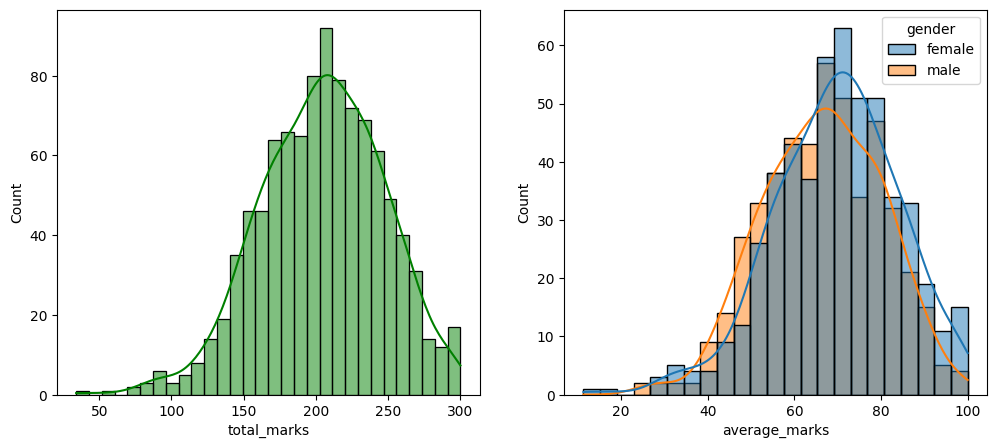

In [28]:
plt.subplots(1,2, figsize=(12,5))
plt.subplot(121)
sns.histplot(x = 'total_marks', data=data, kde=True,bins=30 ,color= 'g')
plt.subplot(122)
sns.histplot(x = 'average_marks', data=data, kde=True, hue='gender')

plt.show()

## INSIGHTS
* most of the students have scored between 180-230 marks
* Female Students have good score  than male 

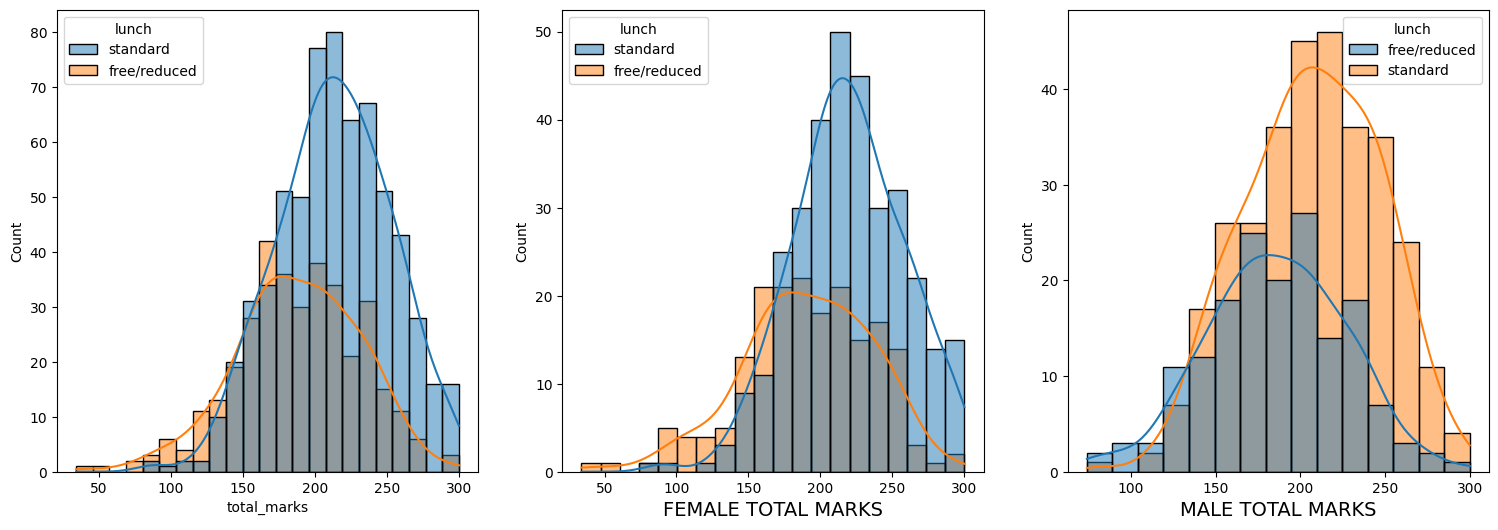

In [47]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=data,x='total_marks',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=data[data.gender=='female'],x='total_marks',kde=True,hue='lunch')
plt.xlabel('FEMALE TOTAL MARKS', fontsize = 14)
plt.subplot(143)
sns.histplot(data=data[data.gender=='male'],x='total_marks',kde=True,hue='lunch')
plt.xlabel('MALE TOTAL MARKS', fontsize = 14)
plt.show()

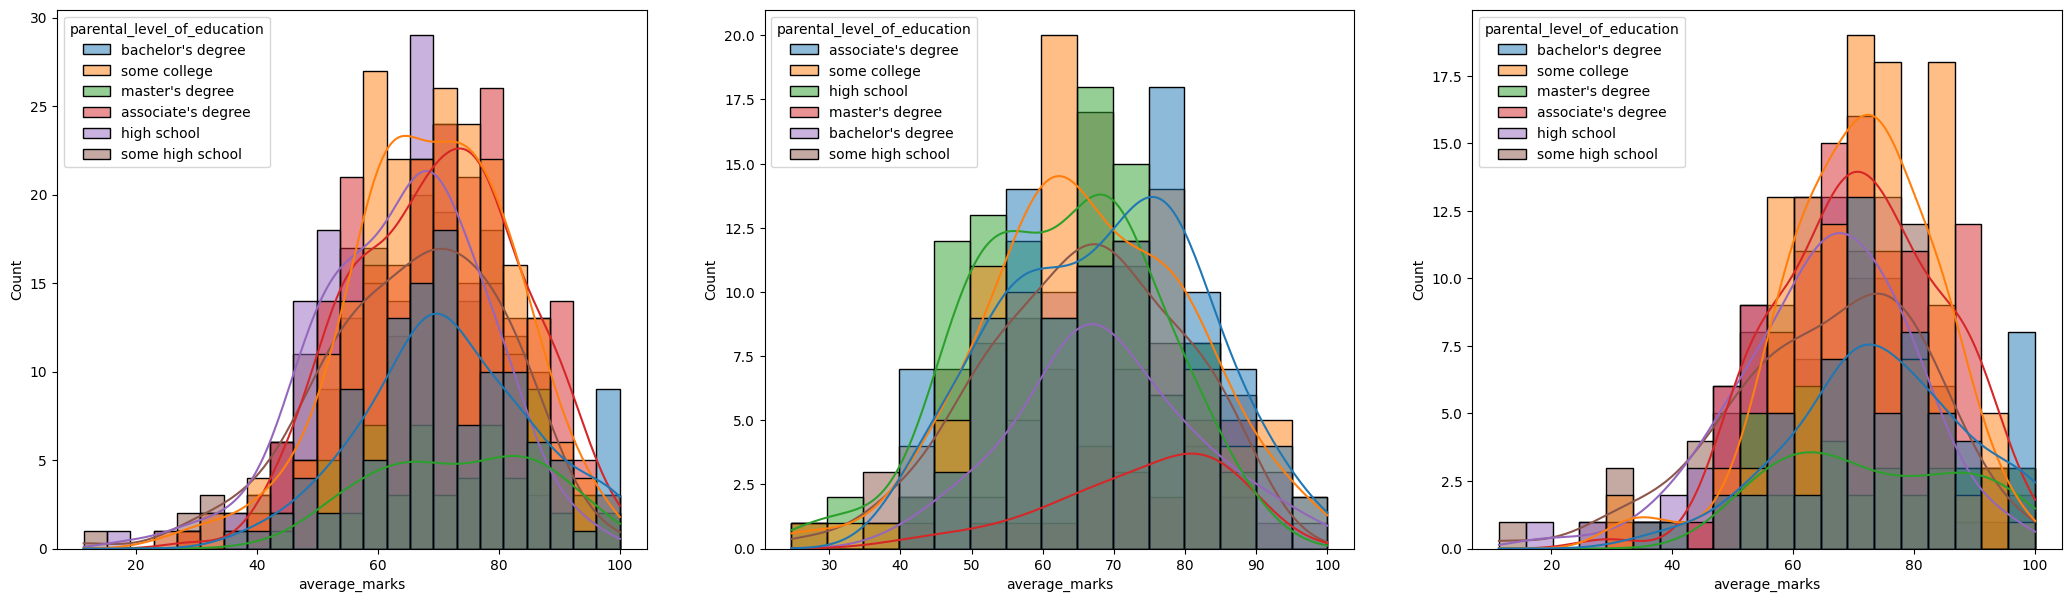

In [45]:
plt.subplots(1,3, figsize=(35,7))
plt.subplot(141)
sns.histplot(data=data, x ='average_marks', kde=True, hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=data[data.gender == 'male'], x ='average_marks' ,kde=True, hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=data[data.gender == 'female'], x ='average_marks',kde=True, hue='parental_level_of_education')
plt.show()

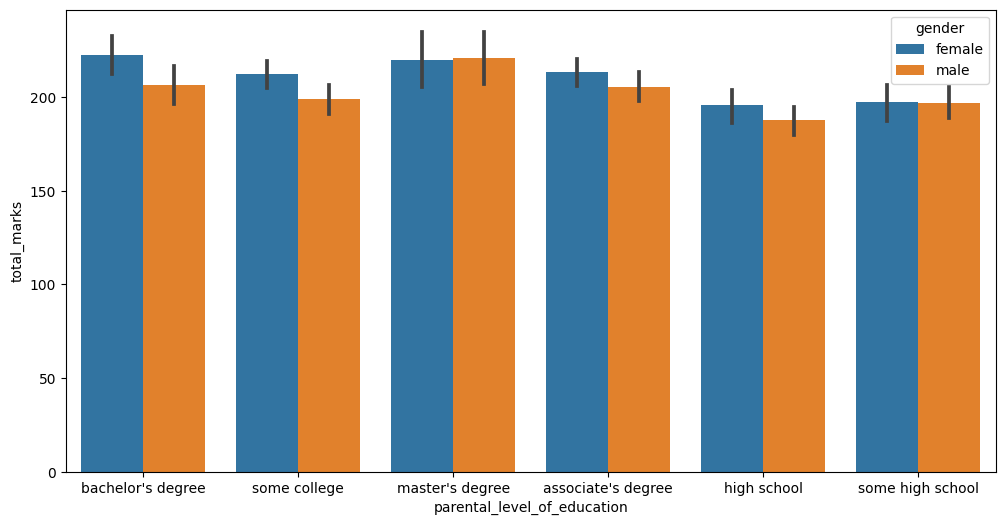

In [52]:
plt.figure(figsize =(12,6))
sns.barplot(x='parental_level_of_education', y='total_marks',data=data, hue='gender')
plt.show()